La documentación de los métodos o algoritmos es con finalidad de sustentar las herramientas a utilizar, sin embargo
en un marco de trabajo como teoría de la información estos métodos son aplicables a varios fenómenos físicos, aunque
en estos ejemplos se muestren otro tipo de problemas, podemos generalizar el tratamiento siempre que tomemos en cuenta
la naturaleza de las observaciones o datos.

Generalmente estamos interesados en analizar un conjunto de datos $X$ tal que  $ X \in \mathbb{C^{mxn}} $

***
$$
X = 
\begin{bmatrix}
|   & |   &     & | \\
x_1 & x_2 & ... & x_n\\
|   & |   &     & |
\end{bmatrix}
\\\
$$
***
Los vectores columnas $x_k$ son mediciones del arreglo experimental, tambien pueden representar el estado físico de un
sistema que evoluciona a través del tiempo

El algoritmo SVD proporciona una descomposición que existe para cada matriz con entradas en $\mathbb{C} \ \  i.e. \ \ X \in \mathbb{C^{nxm}}$

$$
 \
 X = U \Sigma V^{*}
$$

Donde $U \in \mathbb{C^{nxn}} \;$ y  $ \; V \in \mathbb{C^{mxm}}$

***

Ejemplo: Para ilustrar la descomposición de valores singulares representativos de un conjunto, se utiliza una base de datos con rostros y se reconstruyen imágenes a partir de los valores singulares del conunto
***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

# DOC: Estos parametros solo configuran parametros de la grafica o plot

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

# DOC: mat_contents es un objeto diccionario o JSON

mat_contents = scipy.io.loadmat(os.path.join('..','DATA','allFaces.mat'))
print('Tipo de objeto   : ',type(mat_contents))
print('Keys o atributos : ', mat_contents.keys())

Tipo de objeto   :  <class 'dict'>
Keys o atributos :  dict_keys(['__header__', '__version__', '__globals__', 'faces', 'n', 'm', 'sub', 'nfaces', 'person'])


In [30]:
mat_contents['faces'].shape

(32256, 2410)

In [86]:
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])
print('Valor de m : ',m)
print('Valor de n : ',n)
print('COntenido de mat_contents: ' , mat_contents['nfaces'])

Valor de m :  168
Valor de n :  192
COntenido de mat_contents:  [[64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
  64 64 64 64 64 64 64 64 64 64 64 64 64 64]]


In [39]:
nfaces

array([64, 62, 64, 64, 62, 64, 64, 64, 64, 64, 60, 59, 60, 63, 62, 63, 63,
       64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
       64, 64, 64, 64], dtype=uint8)

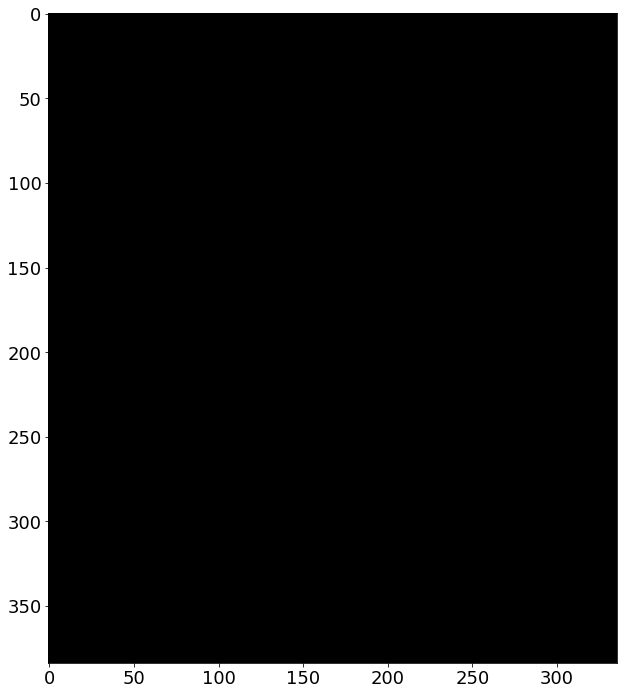

In [89]:

allPersons = np.zeros((n*2,m*2))
count = 0

io.imshow(allPersons)

In [140]:
np.sum(nfaces[:2])

126

In [147]:
faces[:,np.sum(nfaces[:1])].shape

(32256,)

In [148]:
faces[np.sum(nfaces[:1])].shape

(2410,)

In [157]:
np.sum(nfaces[:1])

64

/home/jupyter/.local/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


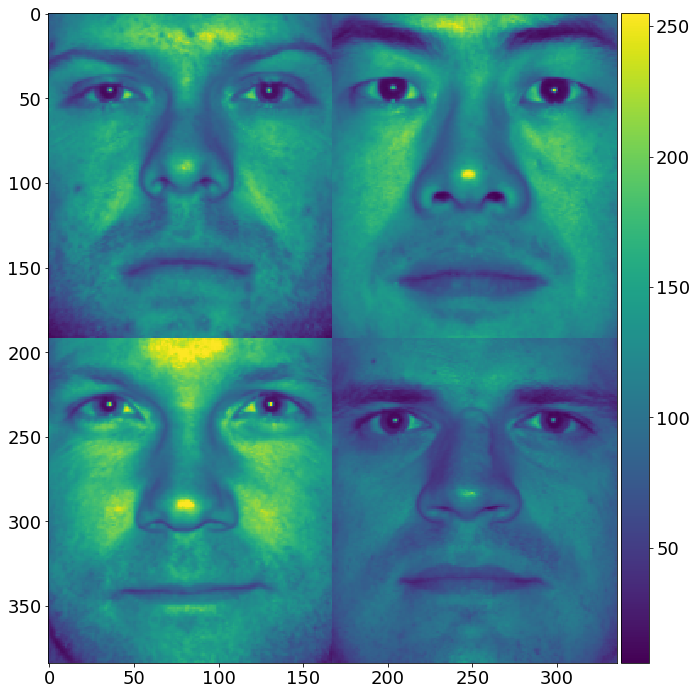

In [143]:
count = 0
apps  = []
coss  = []
for j in range(2):
    for k in range(2):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

io.imshow(allPersons)

In [50]:
import numpy as np
Y = np.arange(64).reshape(8, 8)
Y


array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [154]:
Y[:,:4]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19],
       [24, 25, 26, 27],
       [32, 33, 34, 35],
       [40, 41, 42, 43],
       [48, 49, 50, 51],
       [56, 57, 58, 59]])

In [129]:
X = np.ndarray.flatten(Y)

In [130]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

### Primer aproximación para la descomposicion en valores singulares de espectros Raman

Primeramente se propone una lectura de espectros Raman, estos serán objectos de la clase RamanSpectra

In [58]:
# Objetivo : Empaquetar los espectros Raman en un Array para su decomposición en valores singulares
# 
# El cálculo debe realizarse con la matriz M y la transpuesta MT

import matplotlib.pyplot as plt
import numpy as np
import os

# Definimos la Clase base "RamanSpectra" que debera contener información relacionada con la medicion
# TODO: Podemos añadir un mapeo de intensidades para caracterizar la superficie de medicion
# TODO: Añadir otros parametros de informacion para la muestra o espectro

class RamanSpectra(object):

    def __init__(self,data,info):
        self.data = data
        self.info = info
        self.x = self.data[0]
        self.y = self.data[1]
        return;



### La clase RamanSpectraGroup colecta todos los espectros Raman en una carpeta definida

In [59]:

class RamanSpectraGroup(object):

    def __init__(self):
        # Un Grupo de espectros Raman será una lista de Objectos RamanSpectra
        # con los atributos de info y data, inicialmente el atributo spectra es una lista vacía

        # TODO: Es posible añadir una opcion que distinga cuando un espectro ya ha sido añadido al grupo de
        # espectros Raman
        
        self.ramanSpectra = []
        return;

    def getFromFolder(self, folder):
        # NOTE: Este método no verifica si los archivos en el folder seleccionado ya se encuentran en self.spectra
        # el método construye una lista de archivos en el directorio seleccionado y llama al método
        # getDetailedSpectra con una lista que pasa a su argumento (self.files)
        self.folder = '/' + folder
        self.path   = os.getcwd()
        # TODO: Verificar si es posible discriminar con - if file in files - para evitar la duplicacion de archivos
        self.files  = [ self.path + self.folder + '/' + f for f in os.listdir(self.path + self.folder)]
        self.getDetailedSpectra(self.files)
        return;

    def getDetailedSpectra(self, targets):
        for file in targets:
            with open(file, 'r', encoding = 'unicode_escape') as tempfile:
                content = tempfile.read()
                info    = content.split('#Acquired')[1].split('\n')[0].replace("=\t",'')
                values  = content.split('#Acquired')[1].split('\n')[1:-1]
                spx=[]
                spy=[]
                for string_values in values:
                    try:
                        x = float(string_values.split('\t')[0])
                        y = float(string_values.split('\t')[1])
                    except:
                        print('Ocurrio un error al hacer la lectura de los archivos')
                    spx.append(x)
                    spy.append(y)
                self.ramanSpectra.append(RamanSpectra((spx,spy), info ))
        return;
    
    def returnMatrix(self, intt, xy = 1):
        ls = []
        for raman in self.ramanSpectra:
            ls.append(raman.data[xy])
        return ls;

In [60]:
rgroup = RamanSpectraGroup()
rgroup.getFromFolder('datosramana')
rgroup.getFromFolder('datosramanb')
rgroup.getFromFolder('datosramanc')

In [61]:
ls = []
for spectra in rgroup.ramanSpectra:
    ls.append(spectra.y)

ls = np.column_stack(ls)



In [62]:
ls

array([[  42.,   52.,   36., ...,   40.,   46.,   40.],
       [  44.,   54.,   46., ...,   46.,   48.,   46.],
       [  46.,   48.,   54., ...,   52.,   56.,   52.],
       ...,
       [2710., 2318., 2606., ..., 1378., 2706., 1378.],
       [2708., 2338., 2562., ..., 1394., 2680., 1394.],
       [2646., 2336., 2628., ..., 1394., 2738., 1394.]])

/home/jupyter/.local/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


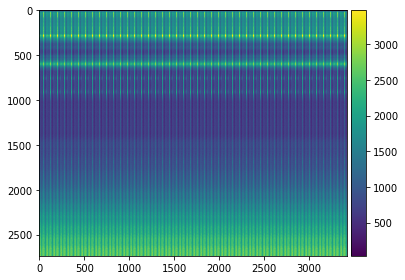

In [63]:
from skimage import io
import numpy as np
io.imshow(ls)

In [64]:
U, S, VT = np.linalg.svd(ls,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()